# My Machine Learning cheat sheet v1.0

Machine Learning is the primary mean by which data science manifests itself, using libraries like scikit-learn and Tensorflow it may seem quite easy juste like a Drag and Drop thing. Unfortunately the reality is rarely that simple.

To be effective, Machine Learning should be approached with a firm grasp of the strenghts and weaknesses of each method, as well as a grasp of general concepts such as bias and variance, overfitting and underfitting...

in this document i'll try to do my best to explain every concept and algorithm in machine Learning *and Deep Learning*. This is v1.0 because i myself i'm still learning and still got tons of videos and books to watch and read, so i'll be updating it frequently whenever i get the chance.

---------------

##### V 1.0: the fundamental vocabulary and concepts of machine learning, scikit-learn API, some basic examples.

---------------



>  **Machine Learning**: Machine is primary described as a subfield of artificial intelligence, but in the data science context it is a means of building models of data. The learning in machine learning describes the way the computer can predict from already observed data the behaviour of future data.

> ** Supervised Learning**: IN SL there is a modeling of the relationship between measured features of data and associated labels. Once the model is determined, it ca be used to predict the behavior of new unknown data

> ** Unsupervised Learning**: USL is often described as *letting the dataset speak for itself*

# Basic Introductory examples

### Classification

to make it easy, this is a set of labeled points. I think it is easy to see that blue points are in the top , and red one on the bottom and we can clearly draw a straight line to separate both of them. Well that exactly what Classification is
![A set of labeled points](https://www.safaribooksonline.com/library/view/python-data-science/9781491912126/assets/pyds_05in01.png)

What the classification model will do is draw the most optimal line, and now that the line have be drawn, for every new entry point, if it is on the top of the line then it will becomme a blue point, and if this point is on the bottom it will become a red point, and that is what learning in machine learning is again
![The trained model](https://www.safaribooksonline.com/library/view/python-data-science/9781491912126/assets/pyds_05in02.png)

when such a model can be useul?: a basic example will be a very basic mail spam detection model. the model will work as if the mail contains certain words like 'Porn, Viagra, make millions in a day' it will be labeled **spam** and in this case will become a red dot, otherwise it will become a blue dot. and of course to make it more effective we can add features like words frequency, mail sender... 


--------------------

### Regression

As with the classification example, we have two-dimensional data; that is; there are two features describing each data point, the color of each point represents the continuous label for that point. There are multiple regression models that can be used, for this example we will use a simple linear regression. we will treat the label as a third spatial dimension.
![a set of points each with a continuous label](https://www.safaribooksonline.com/library/view/python-data-science/9781491912126/assets/pyds_05in04.png)

This is a higher level generalization of the problem of fitting a line to data with two coordinates
![setup visualization](https://www.safaribooksonline.com/library/view/python-data-science/9781491912126/assets/pyds_05in05.png)

We can notice that the *feature1 - feature2* plane is the same as in the two-simensional plot above, we have also represented the labels by both color and three-dimentional axis position. If we fit a plane here and return to the two-dimensional projection we get the following result
![](https://www.safaribooksonline.com/library/view/python-data-science/9781491912126/assets/pyds_05in06.png)
if we feed the model new data we get the following result
![](https://www.safaribooksonline.com/library/view/python-data-science/9781491912126/assets/pyds_05in07.png)
This kind of model can be applied in real world to something like computing the distance to galaxies observed through telescope
- *feature1, feature2 --> brithness of each galaxy at one of the many wavelengths of colors
- label --> distance of the galaxy
we can use a small number of galaxies to create the base model and then use it to estimate the distance to other galaxies...


-------------

### Clustering: Infering labels on unlabeled data

The two examples above were examples os Supervised Learning.
One common case of Unsepervised Learning is **Clustering** in which data is automatically assigned to some number of discrete groups.
![](https://www.safaribooksonline.com/library/view/python-data-science/9781491912126/assets/pyds_05in08.png)

By eye we can clearly see that there is three or maybe four distinct groups. given this input, a clustering model will use the intrinsic structure of the data o determine which points are related. Using an algorithm like k-means algorithm we find the clusters.

k-means fits a model consisting of k cluster centers; the optimal centers are assumed to be those that minimize the distance of each point from its assigned center. Again, this might seem like a trivial exercise in two dimensions, but as our data becomes larger and more complex, such clustering algorithms can be employed to extract useful information from the dataset.
![](https://www.safaribooksonline.com/library/view/python-data-science/9781491912126/assets/pyds_05in09.png)



----------

### Dimensionality Reduction: Inferring structure of unlabeled data

Dimensionality reduction is another example of an unsupervised algorithm
For this examples, it is somewhat clear that there is some kind of structure in this data. This data was drawn for a one-dimensional line that is arranged in a spiral within this two-dimensional space. So in this case the data is embedded in higher dimensional space. A suitable simensionality reduction model would be able to pull out this lower simensionality representation

![](https://www.safaribooksonline.com/library/view/python-data-science/9781491912126/assets/pyds_05in10.png)

The colors change uniformly along the spiral, which indicates that the algorithm did detect the structuure we saw by eye. But the true power of dimentionality reduction models comes with datasets that have 100s or 1000s of features. Visualizing such a data is a challenge, and one way we can make it more manageable is to use a dimentionality reduction technique to reduce the data to two or three dimensions
![](https://www.safaribooksonline.com/library/view/python-data-science/9781491912126/assets/pyds_05in11.png)





# Scikit-learn
scikit learn is a package that provide us with a large number of common machine learning algorithm

In [1]:
import warnings
warnings.filterwarnings('ignore')

#the best way to think of data in scikit learn is in term of tables
#we will use the iris data, using seabon it will be imported as a DataFrame
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

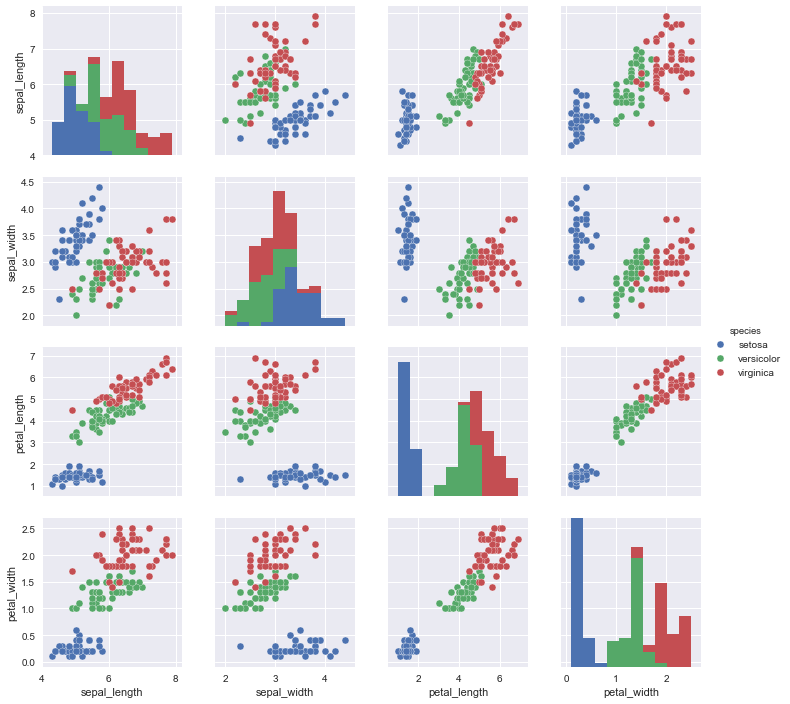

In [2]:
#each row of the data refers to a single obsrved flower, so every row is a sample
#each column refers to a particular feature, so every column is a feature
#Then there is the target array, the Target Array is generally quite different form other columns,and is usually what we want to predict
#for this case it is the species column
%matplotlib inline
sns.set()
sns.pairplot(iris, hue='species', size=2.5);

In [3]:
#for use in scikit-learn, we will extract the feature matrix and
#target array from the DataFrame
X_iris = iris.drop('species', axis = 1) # the feature matrix
X_iris.shape

(150, 4)

In [4]:
y_iris = iris['species'] #the target array
y_iris.shape

(150,)

To sumarize, the expected layout of features and target values is visualized as:
![](https://www.safaribooksonline.com/library/view/python-data-science/9781491912126/assets/pyds_05in13.png)

The main steps for using the scikit learn api are:
1. Choose a class of model by importing the appropriate estimator class
2. choose models hyperparameters by instantiating this class with desired values
3. arrange data into feature matrix and target vector
4. Fit the model to your data by calling the fit method
5. apply the model to new data

**FOR SUPERVISED LEARNING** often we predict labels for unknown data using the predict() method
**FOR UNSUPERVISED LEARNING** we often transform or infer properties of the data using transform() or predict()

# SUPERVISED LEARNING: simple Linear Regression

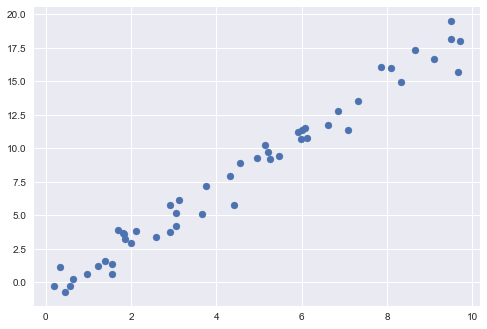

In [5]:
# creating our data
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [6]:
#and now lets apply our recipe described earlier
#1. Choose a class of model
from sklearn.linear_model import LinearRegression

In [7]:
#2. choose model hyperparameter
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
#3. arrange data into a features matrix and target vector
X = x[:, np.newaxis]
X.shape

(50, 1)

In [9]:
#4.fit the model to your data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

This fit() command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore. In Scikit-Learn, by convention all model parameters that were learned during the fit() process have trailing underscores; for example, in this linear model, we have the following:

In [10]:
model.coef_

array([ 1.9776566])

In [11]:
model.intercept_

-0.90331072553111635

These two parameters represent the slope and intercept of the simple linear fit to the data. Comparing to the data definition, we see that they are very close to the input slope of 2 and intercept of –1

In [12]:
#5. predict leabels for unknown data
xfit = np.linspace(-1, 11)

In [13]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

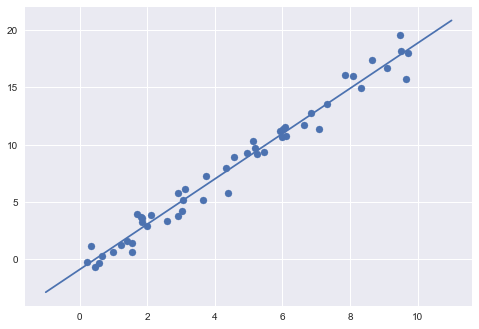

In [14]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

# SML: Iris Classification
We will use a Gaussian Naive Bayes model to draw a baseline classification

In [15]:
#we would like to evaluate the model on data it has not seen before, and so we will split 
#our data into a trainng set and a testing set

In [16]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state = 1)

C:\Users\khalil\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
#and now lets follow our recipe
from sklearn.naive_bayes import GaussianNB #1. Choose a model
model = GaussianNB()                       #2. instantiate model
model.fit(Xtrain, ytrain)                  #3. fit model to data
y_model = model.predict(Xtest)             #4. predict new data

In [18]:
#we can use the accuracy_score utility to see the fraction of predicted labels
#that  match their true value:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.97368421052631582

In [19]:
#Great 97%, then our naive classification algorithm is quite effective for this particular dataset

# USML: Iris Dimentionality

As an example of an unsupervised learning problem, let’s take a look at reducing the dimensionality of the Iris data so as to more easily visualize it. Recall that the Iris data is four dimensional: there are four features recorded for each sample.


The task of dimensionality reduction is to ask whether there is a suitable lower-dimensional representation that retains the essential features of the data. Often dimensionality reduction is used as an aid to visualizing data; after all, it is much easier to plot data in two dimensions than in four dimensions or higher!


Here we will use principal component analysis (PCA), which is a fast linear dimensionality reduction technique. We will ask the model to return two components—that is, a two-dimensional representation of the data.

In [20]:
# Following our recipe again

from sklearn.decomposition import PCA  #1. choose a model
model = PCA(n_components = 2)          #2. instantiate the model
model.fit(X_iris)                      #3. fit our data "Y is not specified"
X_2D = model.transform(X_iris)         #4. Transform the data to two dimensions

Now let’s plot the results. A quick way to do this is to insert the results into the original Iris DataFrame, and use Seaborn’s lmplot to show the results

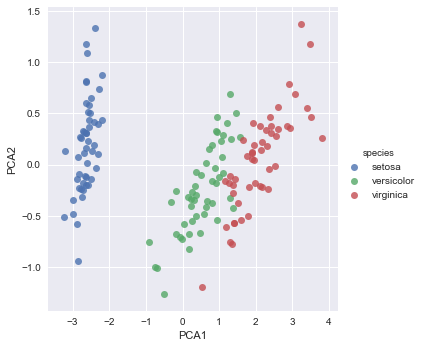

In [21]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue = 'species', data = iris, fit_reg = False);

We see that in the two-dimensional representation, the species are fairly well separated, even though the PCA algorithm had no knowledge of the species labels! This indicates to us that a relatively straightforward classification will probably be effective on the dataset, as we saw before.


-------------


# USML: Iris Clustering
Let’s next look at applying clustering to the Iris data. A clustering algorithm attempts to find distinct groups of data without reference to any labels. Here we will use a powerful clustering method called a Gaussian mixture model (GMM)

In [23]:
from sklearn.mixture import GMM                      # 1. Choose the model class
model = GMM(n_components=3, covariance_type='full')  # 2. Instantiate the model w/ hyperparameters
model.fit(X_iris)                                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)                        # 4. Determine cluster labels

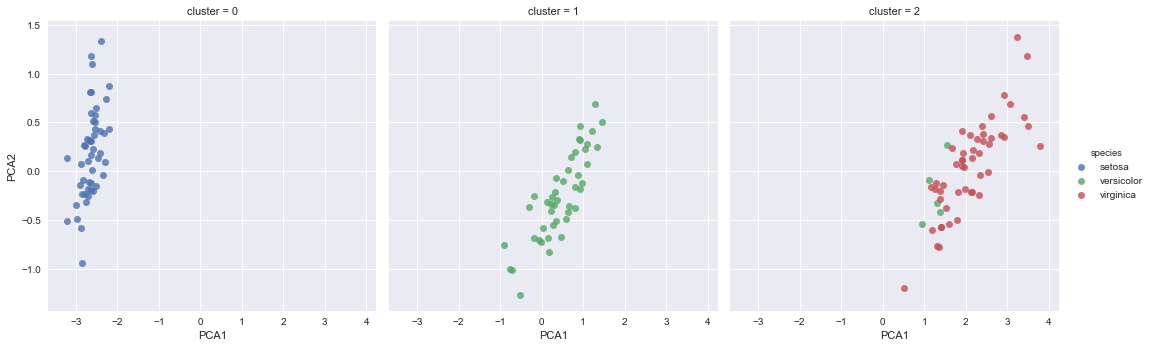

In [24]:
#As before, we will add the cluster label to the Iris DataFrame and use Seaborn to plot the results
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

By splitting the data by cluster number, we see exactly how well the GMM algorithm has recovered the underlying label: the setosa species is separated perfectly within cluster 0, while there remains a small amount of mixing between versicolor and virginica. This means that even without an expert to tell us the species labels of the individual flowers, the measurements of these flowers are distinct enough that we could automatically identify the presence of these different groups of species with a simple clustering algorithm! This sort of algorithm might further give experts in the field clues as to the relationship between the samples they are observing.

# Exploring HandWritten Digits

To demonstrate these principles on a more interesting problem, let’s consider one piece of the optical character recognition problem: the identification of handwritten digits. In the wild, this problem involves both locating and identifying characters in an image. Here we’ll take a shortcut and use Scikit-Learn’s set of preformatted digits, which is built into the library.

In [25]:
#Loading and visualizing the digits data
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape
# The images data is a three-dimensional array: 1,797 samples, each consisting 
# of an 8×8 grid of pixels. Let’s visualize the first hundred of these

(1797, 8, 8)

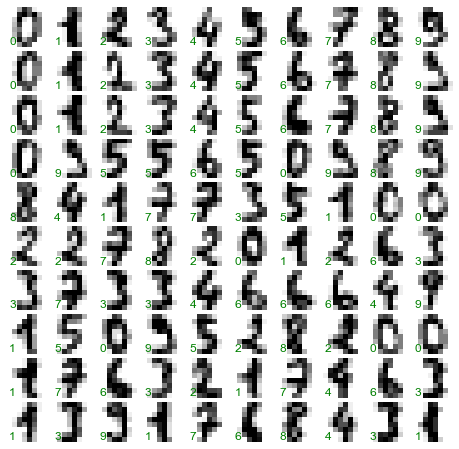

In [26]:
fig, axes = plt.subplots(10, 10, figsize = (8, 8),
                        subplot_kw={'xticks': [], 'yticks':[]},
                        gridspec_kw = dict(hspace = 0.1, wspace = 0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
    transform=ax.transAxes, color='green')

In order to work with this data within Scikit-Learn, we need a two-dimensional, [n_samples, n_features] representation. We can accomplish this by treating each pixel in the image as a feature—that is, by flattening out the pixel arrays so that we have a length-64 array of pixel values representing each digit. Additionally, we need the target array, which gives the previously determined label for each digit. These two quantities are built into the digits dataset under the data and target attributes, respectively

In [27]:
X = digits.data
X.shape

(1797, 64)

In [28]:
y = digits.target
y.shape

(1797,)

In [29]:
#USML: Dimentionality Reduction to visualize our data
from sklearn.manifold import Isomap
iso = Isomap(n_components = 2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

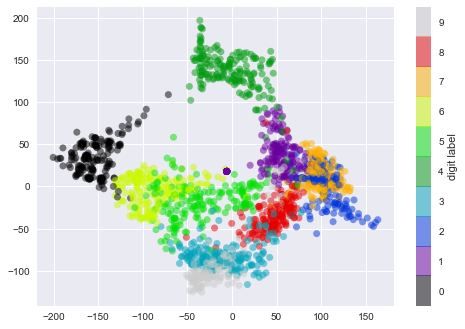

In [30]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))

plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

This plot gives us some good intuition into how well various numbers are separated in the larger 64-dimensional space. For example, zeros (in black) and ones (in purple) have very little overlap in parameter space. Intuitively, this makes sense: a zero is empty in the middle of the image, while a one will generally have ink in the middle. On the other hand, there seems to be a more or less continuous spectrum between ones and fours: we can understand this by realizing that some people draw ones with “hats” on them, which cause them to look similar to fours.

### Classification on digits

In [31]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [32]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [33]:
accuracy_score(ytest, y_model)

0.83333333333333337

With even this extremely simple model, we find about 80% accuracy for classification of the digits! However, this single number doesn’t tell us where we’ve gone wrong—one nice way to do this is to use the confusion matrix, which we can compute with Scikit-Learn and plot with Seaborn

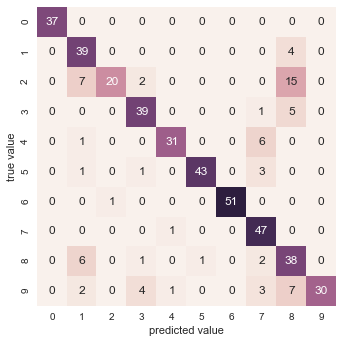

In [34]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square= True, annot = True, cbar = False)
plt.xlabel('predicted value')
plt.ylabel('true value')

This shows us where the mislabeled points tend to be: for example, a large number of twos here are misclassified as either ones or eights. Another way to gain intuition into the characteristics of the model is to plot the inputs again, with their predicted labels. We’ll use green for correct labels, and red for incorrect labels

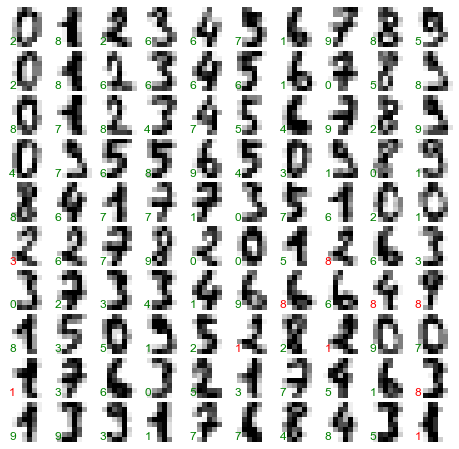

In [35]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

Examining this subset of the data, we can gain insight regarding where the algorithm might not be performing optimally. To go beyond our 80% classification rate, we might move to a more sophisticated algorithm, such as support vector machines or random forests, or another classification approach.

# Hyperparameters and Model Validation
From what i've learned today. The choice of a model and of hyperparameters are perhaps the most important part of using these tools and techniques effectively. There should be a way to validate that our model and our hyperparameters are good fit for the data. "I've also learned that statistics and a deep understanding of each one od these models are the two parameters that makes a Data Scientist Shine, so once i'm finished with this Machine Learning cheat sheet i'll create a new one about statistical thinking in Python and Later in R" 

## Model Validation "Probably the wrong way"

In [36]:
#We will use the iris data again
#We did change it in the previous chapters so we'll load it again
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [37]:
#lets try with a k-neighbors model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)

model.fit(X, y)
y_model = model.predict(X)

accuracy_score(y, y_model)

1.0

We see an accuracy score of 1.0, which indicates that 100% of points were correctly labeled by our model. It would have made me happy just yesterday.

The nearest neighbor model is an instance based estimator that simply stores the training data, and predicts labels by comparing new data to these stored points, except in contrived cases, it will get 100% accuracy every time!

## A better model validation "for now"

In [38]:
X1, X2, y1, y2 = train_test_split(X, y, random_state = 0, train_size = 0.5)

model.fit(X1, y1)
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.90666666666666662

90% accuracy is a more reaseanable result, and if the data was way bigger and we trained our model in an even smaller subset we will get an even lower accuracy.

"There always should be a training and test sets" but one disadvantage of using this holdoutis that we lost a portion of our data.

A new method i just came across in a book is **cross validation**, That is to do a sequence of fits where each subste of the data is used both as a training set and as a validation set.
![Cross Validation](https://www.safaribooksonline.com/library/view/python-data-science/9781491912126/assets/pyds_05in22.png)

In [39]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)

accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.95999999999999996, 0.90666666666666662)

This is called a **two-fold cross-validation** because we split the data into two subsets, but we can easily split ou data into 5 or 10 subsets and train the model on each one of them, fortunately we don't have to dot it by hand!

In [40]:
from sklearn.cross_validation import cross_val_score
cross_val_score(model, X, y, cv = 5)
#and we should get the performance of each model
#of course splitting the data even further is not productive because we'll find ourself
#predicting data from a 1row column and of course we will reach 100% accuracy
#so cross validation is only useful when the dataset is quite big and even though
# there should be a limit to how much we split the data....

array([ 0.96666667,  0.96666667,  0.93333333,  0.93333333,  1.        ])

### The BIAS-VARIANCE TRADE-OFF
![](https://www.safaribooksonline.com/library/view/python-data-science/9781491912126/assets/pyds_05in24.png)

Neither of these models is a good fit for our data

The model on the left attempts to find a straight-line fit through the data. The straight-line model will never be able to describe this dataset well. Such a model is said to underfit the data; that is, it does not have enough model flexibility to suitably account for all the features in the data "high bias".

The model on the right attempts to fit a high-order polynomial through the data. Here the model fit has enough flexibility to nearly perfectly account for the fine features in the data, but even though it very accurately describes the training data, its precise form seems to be more reflective of the particular noise properties of the data rather than the intrinsic properties of whatever process generated that data. Such a model is said to overfit the data "high variance".

if we add a new data this will happen
![](https://www.safaribooksonline.com/library/view/python-data-science/9781491912126/assets/pyds_05in25.png)

##### The score here is **R²** score, the coefficient of determination which measures how well a model performs *"more details later"*. R² = 1 indicates a perfect match, R² = 0 indicates the model does no better than simply taking the mean of the data, and negative values are even worse

The diagram below is called the validation curve, in it
- The training score is always higher than the validation score.
- For very low model complexity (a high-bias model), the training data is underfit
- For very high model complexity (a high-variance model), the training data is overfit
- For some intermediate value, the validation curve has a maximum. This level of complexity indicates a suitable trade-off between bias and variance
![](https://www.safaribooksonline.com/library/view/python-data-science/9781491912126/assets/pyds_05in26.png)

### Validation curve in Scikit learn
an example of using cross-validation to compute the validation curve for a class of models. We will go with a *polynomial regression*
- 1 degree polynomial parameter <==> y = ax + b
- 2 degrees polynomial parameter <==> y = ax² + bx + c
- 3 degrees .... and so on

In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))

In [42]:
def make_data(N, err = 1.0, rseed = 1):
    #random sample data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

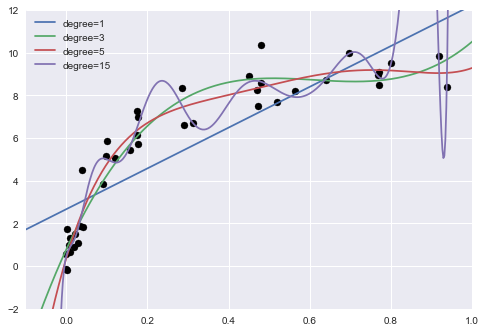

In [43]:
X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color = 'black')
axis = plt.axis()

for degree in [1, 3, 5, 15]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
    
    
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

A useful question to answer is this: what degree of polynomial provides a suitable trade-off between bias (underfitting) and variance (overfitting)?

We can make progress in this by visualizing the validation curve using the validation_curve convenience routine provided by scikit...

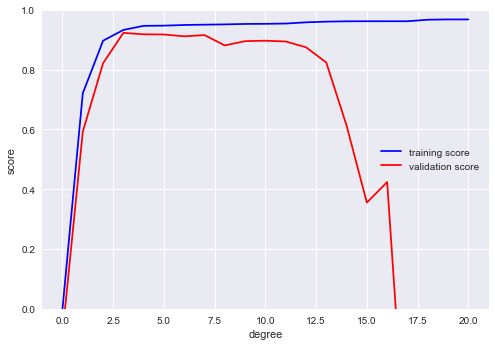

In [44]:
from sklearn.learning_curve import validation_curve

degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                         'polynomialfeatures__degree',
                                         degree, cv = 7)

plt.plot(degree, np.median(train_score, 1), color = 'blue', label = 'training score')
plt.plot(degree, np.median(val_score, 1), color = 'red', label = 'validation score')
plt.legend(loc = 'best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

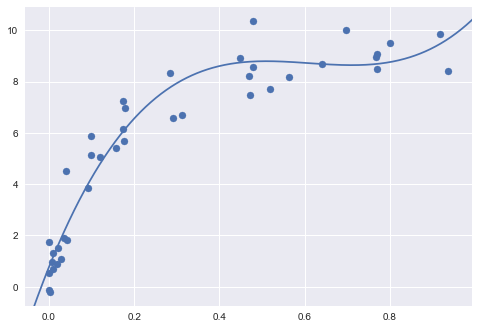

In [45]:
# From the validation curve, we can read off that the optimal trade-off
# between bias and variance is found for a third-order polynomial;

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

# Feature Engineering

One of the most important steps in using machine learning in practice is feature engineering—that is, taking whatever information you have about your problem and turning it into numbers that you can use to build your feature matrix.

### Categorical features

In [46]:
# for a data like 
data = [
           {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
           {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
           {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
           {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
       ]

#is is a very bad idea to do a straightforward numerical mapping like this:
{'Queen Anne': 1, 'Fremont': 2, 'Wallingford': 3};

#such a mapping would imply that Queen Anne < Fremont < Wallingford "in scikitlearn"
# so we instead use a one-hot encoding method
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]], dtype=int32)

the neighborhood column has been expanded into three separate columns

There is one clear disadvantage of this approach: if your category has many possible values, this can greatly increase the size of your dataset. However, because the encoded data contains mostly zeros, a sparse output can be a very efficient solution

In [47]:
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

### Text Features

In [48]:
sample = ['problem of evil',
         'evil queen',

          'horizon problem']

In [49]:
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)

pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

evil  horizon  of  problem  queen
0     1        0   1        1      0
1     1        0   0        0      1
2     0        1   0        1      0

There are some issues with this approach, however: the raw word counts lead to features that put too much weight on words that appear very frequently, and this can be suboptimal in some classification algorithms. One approach to fix this is known as term **frequency–inverse document frequency (TF–IDF)**, which weights the word counts by a measure of how often they appear in the documents. The syntax for computing these features is similar to the previous example:

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

evil   horizon        of   problem     queen
0  0.517856  0.000000  0.680919  0.517856  0.000000
1  0.605349  0.000000  0.000000  0.000000  0.795961
2  0.000000  0.795961  0.000000  0.605349  0.000000

### Imputation of Missing Data

In [51]:
from numpy import nan
X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])

When applying a typical machine learning model to such data, we will need to first replace such missing data with some appropriate fill value. This is known as imputation of missing values, and strategies range from simple (replacing missing values with the mean or median of the column) to sophisticated (using matrix completion or a *robust model* to handle such data).

In [52]:
from sklearn.preprocessing import Imputer
imp = Imputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

array([[ 4.5,  0. ,  3. ],
       [ 3. ,  7. ,  9. ],
       [ 3. ,  5. ,  2. ],
       [ 4. ,  5. ,  6. ],
       [ 8. ,  8. ,  1. ]])

In [53]:
model = LinearRegression().fit(X2, y)
model.predict(X2)

array([ 13.14869292,  14.3784627 ,  -1.15539732,  10.96606197,  -5.33782027])

### Feature Pipeline
With any of the preceding examples, it can quickly become tedious to do the transformations by hand, especially if you wish to string together multiple steps. For example, we might want a processing pipeline that looks something like this:
1. Impute missing values using the mean
2. Transform features to quadratic
3. Fit a linear regression

In [54]:
model = make_pipeline(Imputer(strategy='mean'),
                     PolynomialFeatures(degree=2),
                     LinearRegression())

In [55]:
model.fit(X, y)
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[ 14.  16.  -1.   8.  -5.]


----------------------

----------------------

----------------------

# In Depth: Naive Bayes Classification

This will be the first algorithm that i'll try to understand and explain In-Depth, but this is just v1.0 so if ever i learn something new about this algorithm in another book or after studying it in R i'll add it here

The previous sections were just to summarize a little bit The Machine Learning Process in Python and most of what should be done. Just like this chapter i will revist them whenever i learn something new.

**Naive Bayes models** are a group of extremly fast and simple **classification ** algorithms. Because they are so fast and have so few tunable parameters, they end up being very useful as a quick and dirty baseline for a classification problem.

-----------------

### Bayesian Classification
Naive Bayes classifiers rely on Baye's Theorem, which is an equation describing *the relationship of conditional probabilities of statistical quantities*. In Bayesian classification, we're intrested in finding the probability of a label given some observed features. The Bayesian Theorem looks like
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/b1078eae6dea894bd826f0b598ff41130ee09c19)
And is read: ''The probability of A given B is (Probability of B given A is True * Probability of A) / Probability of B''

So fo machine Learning it will be
![](https://www.safaribooksonline.com/library/view/python-data-science/9781491912126/assets/eq_54.png)

If we are trying to decide two between two labels L1 and L2, then one way to make this decision is to compute the ratio of the posterior probabilities for each label. **There was a mistake in the image so i correct it manually sorry for the bad drawing**
![](https://github.com/sangloo/Data-Science-Learning-Path/blob/master/JupyterProjects%20'WIP'/Capture1.JPG?raw=true)

All we need now is some model by which we can compute (Probability of features given Li) for each label. Such a model is called a **generative model** because it specifies the hypothetical random process that generates the data. Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier. The general version of such a training is a very difficult task, but we can make it simpler assumption about the form of this model

This is where "Naive" in "Naive Bayes" comes from.  We make a very naive assumption about the generative model for each label, we can find a rough approximation of the generative model for each class, and proceed with the Bayesian Classification. **Different types of naive Bayes classifiers rest on different naive assumptions about the data**


###### The Gaussian Naive Bayes
In this classifier, the assumption is that **data from each label is drawn from a simple Gaussian distribution**

- Gaussian distribution: averages of samples of observations of random variables independently drawn from independent distributions converge in distribution to the normal, that is, become normally distributed when the number of observations is sufficiently large. *Wikipidea*

Let's consider the following data

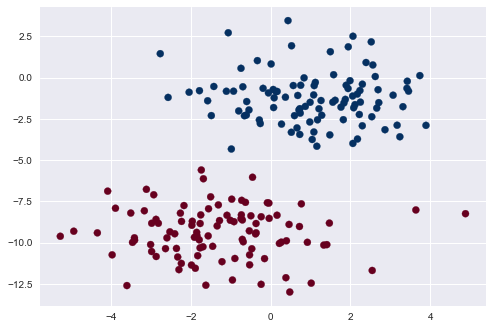

In [56]:
from sklearn.datasets import make_blobs

X, y = make_blobs(200, 2, centers = 2, random_state = 2, cluster_std = 1.5)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'RdBu');

We can fit this model by finding the mean and standard deviation of the points within each label. The result will be something like this
![](https://www.safaribooksonline.com/library/view/python-data-science/9781491912126/assets/pyds_05in39.png)

The ellipses represents the Gaussian gen model for each label, with larger probability toward the center of the ellipses. and so we can calculate the (Probability of features given Li) for any data point.

In [57]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X, y);

In [58]:
#let's generate some new data and predict the label
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

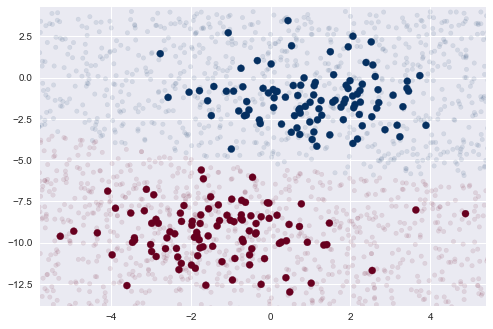

In [59]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

The boundary is slightly curved, generally in this model, the bounday is quadratic.

the final classification will only be as good as the model assumptions that lead to it, which is why Gaussian naive Bayes often does not produce very good results. Still, in many cases—especially as the number of features becomes large—this assumption is not detrimental enough to prevent Gaussian naive Bayes from being a useful method.


### Multinominial Naive Bayes
The multinomial distribution describes the probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates.

The idea is precisely the same as before, except that instead of modeling the data distribution with the best-fit Gaussian, we model the data distribution with a best-fit multinomial distribution.

Multinominial naive Bayes is often used in text classification, where the features are related to word counts or frequencies within the documents to be classified.

In [60]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [61]:
# For simplicity, we will select a few of these categories, and download the training and test set

categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']

train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [62]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers. For this we will use the (TF–IDF), and create a pipeline that attaches it to a multinomial naive Bayes classifier

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(train.data, train.target)
labels = model.predict(test.data)

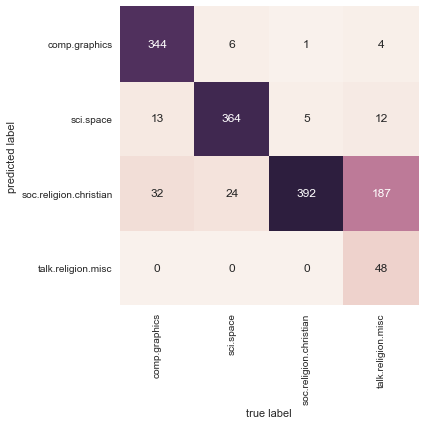

In [64]:
# the confusion matrix between the true and predicted labels for the test data
mat = confusion_matrix(test.target, labels)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Evidently, even this very simple classifier can successfully separate space talk from computer talk, but it gets confused between talk about religion and talk about Christianity

The very cool thing here is that we now have the tools to determine the category for any string, using the predict() method of this pipeline. Here’s a quick utility function that will return the prediction for a single string

In [65]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [66]:
predict_category('sending a payload to the ISS')

'sci.space'

In [67]:
predict_category('discussing islam and atheism')

'soc.religion.christian'

In [68]:
predict_category('what is the screen resolution of my computer?')

'comp.graphics'

Well the results are quite fun and as naive as it is the Naive Bayes produced quite a good result!

### When to use Naive Bayes
Because naive Bayesian classifiers make such stringent assumptions about data, they will generally not perform as well as a more complicated model. That said, they have several advantages:
- extremely fast for both training and prediction
- they provide straightforward predictions
- They are often very easily interpretable
- They have very few tunable parameters

So the Naive Bayesian classifiers are often a good choice for an initial baseline classification. If it does not perform well then its time to explore more sophisticated models.

Some situation where Naive Bayes classifiers can perform well
- When the naive assumptions match the data
- For very well separated categories, when model complexity is less important
- For very high-dimensional data, when model complexity is less important

"" As the dimension of a dataset grow, it is much less likely for any two points to be found close together""


-----------------------

------------------------

------------------------

# In Depth: Linear Regression
Just as Naive Bayes can be a good starting point for classification models, Linear regression is a good starting point for regression tasks. As simple as it may look Linear Regression can be extended to some very complicated models.

#### Simple Linear Regression
We will start with the most familiar linear regression, a straight-line fit to data. This model have the form "y = ax + b", where a is the slope and b is the intercept

Let's consider the following data

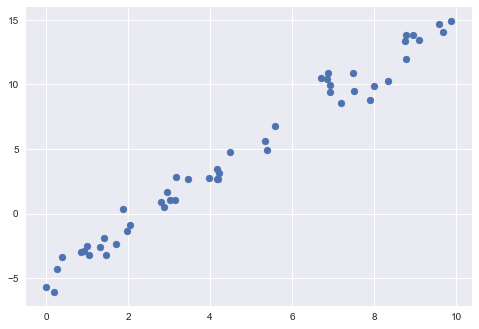

In [69]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

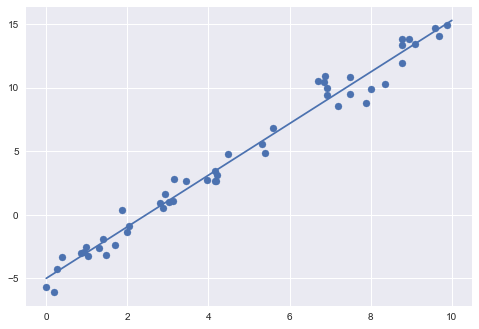

In [70]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

In [71]:
#The slope and intercept of the data are contained in the models fit parameters
print("Model slope", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope 2.02720881036
Model intercept: -4.99857708555


In [72]:
#The results are quite close to the inputs
#The LinearRegression model can also handle multidimensional models of the form:
# y = a + a1 x1 + a2 x2 + a3 x3 ......
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5
[ 1.5 -2.   1. ]


### Basis Function Regression
A trick to adapt linear regression to nonlinear relationships between variables is to transfrom the data according to basis functions. The idea is to take multidimensional linear model
![](https://www.safaribooksonline.com/library/view/python-data-science/9781491912126/assets/eq_66.png)
and build the x1,..., xn from our single dimensional input x.
![](https://www.safaribooksonline.com/library/view/python-data-science/9781491912126/assets/eq_72.png)
We can see that this is still a Linear Model — the linearity refers to the fact that the coefficients a Subscript n never multiply or divide each other. What we have effectively done is taken our one-dimensional x values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between x and y.

Polynomial basis functions

In [73]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias = False)
poly.fit_transform(x[:, None])

array([[  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.]])

We see here that the transformer has converted our one-dimensional array into a three-dimensional array by taking the exponent of each value. This new, higher-dimensional data representation can then be plugged into a linear regression.

In [74]:
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

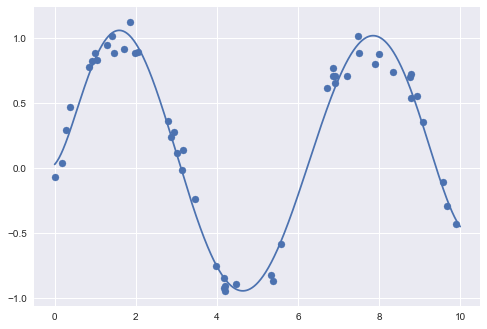

In [75]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

Our linear Model, through the use of 7th order polynomial basis function, can provide an excellent fit to this nonlinear data!

# In-Depth: Support Vector Machines
(SVMs) are a particularly powerful and flexible class of supervised algorithms for both classification and regression. We will look at a classification example.


In the Naive Bayes Classification, we learned a simple model describing the distribution of each underlying class, and used these generative models to probabilistically determine labels for new points. Here we will consider instead discriminative classification: rather than modeling each class, we simply find a line or curve(in two dimensions) or manifold (multiple dimensions) that divides the classes from each other

Let's consider as an axample two classes of points that are well separated

In [76]:
from scipy import stats

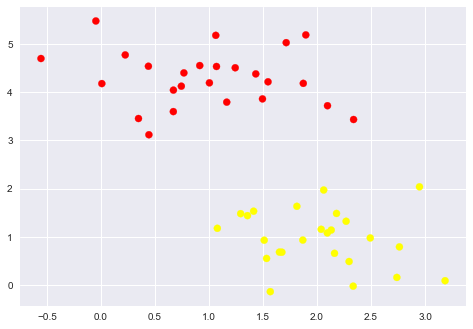

In [77]:
X, y = make_blobs(n_samples = 50, centers = 2, random_state = 0, cluster_std = 0.6)

plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn');

A linear discriminative classifier would attempt to draw a staight line separating the two sets of data, and thereby create a model for classification. For two-dimensional data like that shown here, this is a task we could do by hand. But immediately we see a problem: there is more than one possible dividing line that can perfectly discriminate between the two classes!

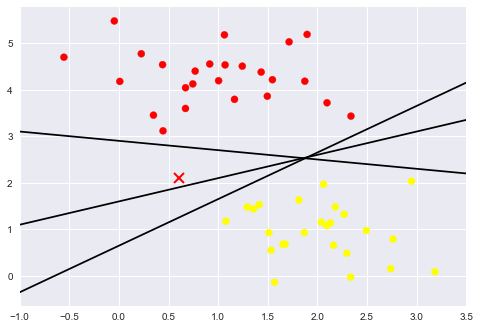

In [78]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color = 'red', markeredgewidth = 2, markersize = 10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')
    
plt.xlim(-1, 3.5);

Like we can see our manually drawn lines might not always work, even though the point we added was hand made but anyway, we should think more before drawing any line, and one way to do that is:

# SVMs: Maximizing the Margin
Rather than drawing a 0width line, let's rather add margins around it, up to the nearest point

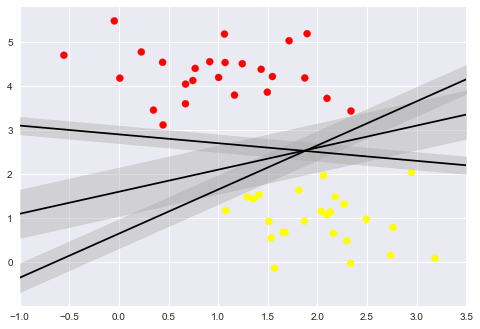

In [79]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor = 'none', color = "#AAAAAA", alpha = 0.4)
    
plt.xlim(-1, 3.5);

In SVMs the line that maximizis the margin the more is the one we will choose

### Fitting a Support Vector Machine

In [80]:
from sklearn.svm import SVC #Support Vector Classifier
model = SVC(kernel = 'linear', C = 1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [81]:
#A conveniance function for plotting....
def plot_svc_decision_function(model, ax=None, plot_support=True):
    # Plot the decision function for a two-dimensional SVC
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

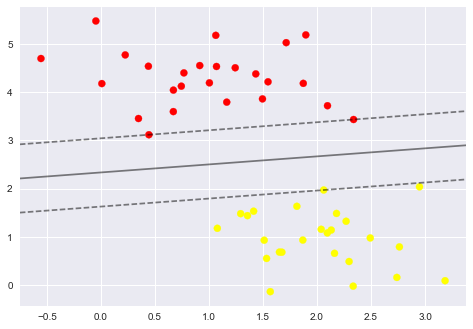

In [82]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn')
plot_svc_decision_function(model);

So this is the optimal dividing line that maximizes the margin between the two sets of points. We can see that there are some points that touch the margin. These points are the pivotal elements of this fit, and are known as the support vectors, and give the algorithm its name ^^, we can access this poinst in scikit learn using the support_vectors_ attribute.

In [83]:
model.support_vectors_

array([[ 0.44359863,  3.11530945],
       [ 2.33812285,  3.43116792],
       [ 2.06156753,  1.96918596]])

For The Support Vector model, any points that are further from the margin and are on the correct side do not modify the fit! as long as they do not cross the margin their position and number do not matter. 

### Kernel SVM
Where SVM becomes extremely powerful is when it is combined with kernels, we've seen an example of kernesl in the Linear Model. In SVM we can use a version of the same idea, To motivate the need for kernels, let's look at some data that is not linearly separable

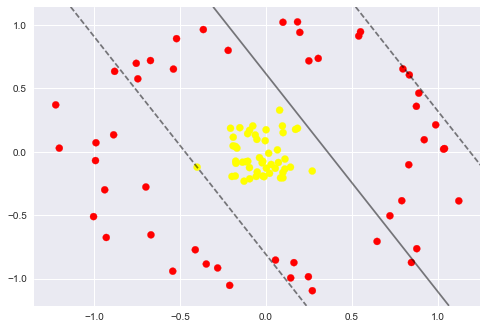

In [84]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor = .1, noise = .1)

clf = SVC(kernel = 'linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn')
plot_svc_decision_function(clf, plot_support = False);

It is clear that no linear discrimination will ever be able to separate this data. But like with the linear regression model let's think in higher dimension such that a linear separator would be sufficient. We can use for example a radial basis function centered on the middle clump

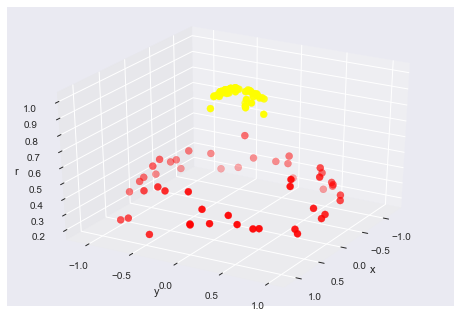

In [85]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

r = np.exp((-X ** 2).sum(1))

def plot_3D(elev = 30, azim = 30, X=X, y=y):
    ax = plt.subplot(projection = '3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev = elev, azim = azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    
interact(plot_3D, elev = [-90, 90], azip = (-180, 180),
        X = fixed(X), y = fixed(y));

With this additional dimension, the data has become linearly separable, by drawing a separating plane.

In this example the basis function is what made this possible, But it is pretty hard to come up with custom functions for each example and tune it until the data becomes linearly separable, so we would like it to be an automated process.

One strategy to this end is to compute a basis function centered at every point in the dataset, and let the SVM sift through the results. But the problem is that it might quickly become computationally intensive as the number of points grow. Fortunately there is something kalled the kernel trick built into SVM that allows for quicker results

In [86]:
#we can do so by changing the kernel hyperparameter to rbf "radial basis function"
clf = SVC(kernel = 'rbf', C = 1E6)
clf.fit(X, y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

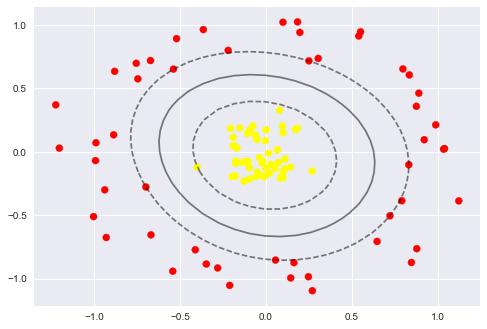

In [87]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

### Tuning the SVM: Softening Margins

For know we've only been using clean datasets, in which a perfect boundary exists, but what if it is not the case and we have some overlap in our data

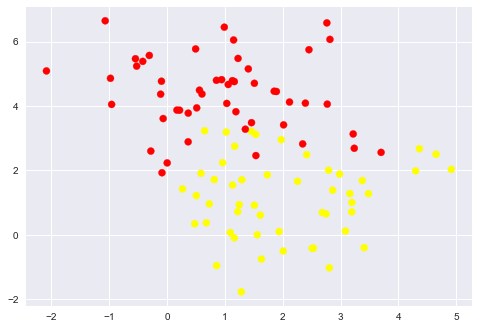

In [88]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

to handle this case, the SVM implementation has a "softens" param that softens the margins, it allows some points to creep into the margin if that allows a better fit. the hardness of the margin is controlled by a tunning parameter, most often known as C. For very large C, the margin is hard, and points cannotlie in it, for smaller C the margin is softer and can grow to encompass some points

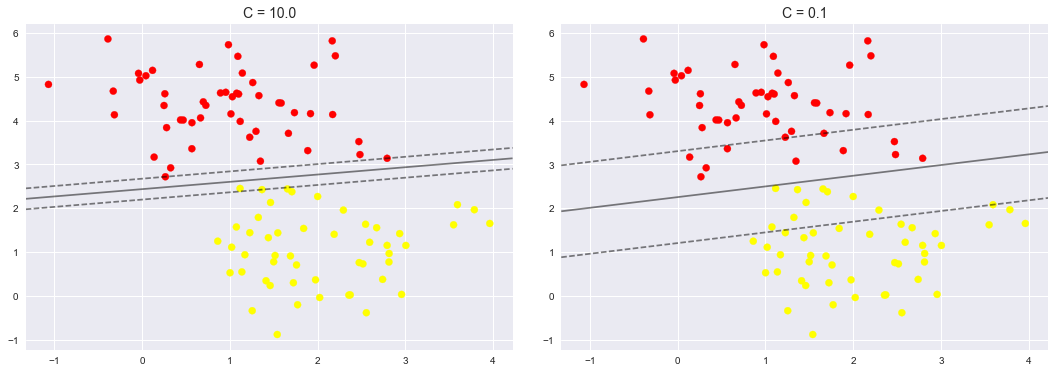

In [89]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

we can use cross validation to decide on the optimal C value, and it generally depends on the kind of results wished for ...

# Example: Face Recognition
SVMs in Action!!

In [90]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person = 60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


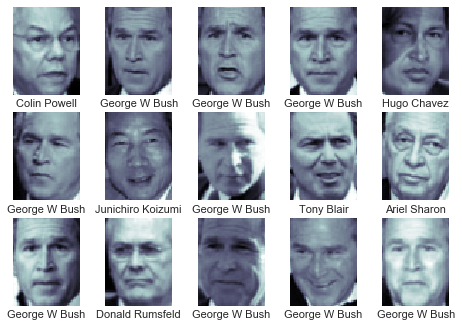

In [91]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks = [],yticks = [], xlabel = faces.target_names[faces.target[i]])

In [92]:
from sklearn.svm import SVC
from sklearn.decomposition import RandomizedPCA

pca = RandomizedPCA(n_components = 150, whiten = True, random_state = 42)
svc = SVC(kernel= 'rbf', class_weight= 'balanced')
model = make_pipeline(pca, svc)

In [93]:
#splitting the data into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state = 42)


We can use a grid search cross validation to explore combinations of parameters. We will adjust C(which controls the margin hardness) and gamma(chich controls the size of the radial function kernel), and determine the best model

In [94]:
from sklearn.grid_search import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
             'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

Wall time: 19.7 s
{'svc__C': 5, 'svc__gamma': 0.001}


In [95]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

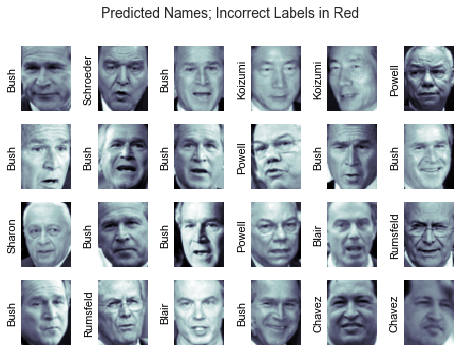

In [96]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap = 'bone')
    axi.set(xticks = [], yticks = [])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                  color = 'black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size = 14);

We can see that in this set at least there was no wrong prediction, To get a better look at our estimator's performance we can use the classification report and the matrix of confusion

In [97]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names = faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.62      0.87      0.72        15
     Colin Powell       0.82      0.88      0.85        68
  Donald Rumsfeld       0.72      0.84      0.78        31
    George W Bush       0.98      0.80      0.88       126
Gerhard Schroeder       0.79      0.83      0.81        23
      Hugo Chavez       0.88      0.75      0.81        20
Junichiro Koizumi       0.80      1.00      0.89        12
       Tony Blair       0.83      0.95      0.89        42

      avg / total       0.87      0.85      0.85       337



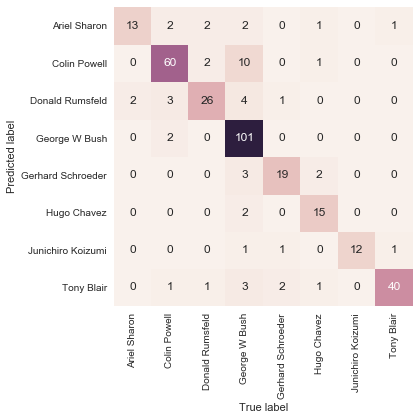

In [98]:
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False,
           xticklabels = faces.target_names, yticklabels = faces.target_names)
plt.xlabel('True label')
plt.ylabel('Predicted label');

For a real worl example of facial recognition, images don't come cropped into nice grid, so there should be an algorithm to find faces first and extract features that are independent of the pixellation. For this kind of application, one good option is to make use of OpenCV, which comes with some pretty implementations of feature extraction tools for images specially faces

### SVM Summary
what make them a powerful classification method:
- Quite performant due to their dependence on relatively few support vectors
- The prediction phase is very fast 
- They are only affected by points near the margin, so they work well for high-dimensional data
- Their integration with kernel methods makes them very versatile, able to adapt to many types of data

Some disadvantages:
- The results are strongly dependent on a suitable choice for the softening parameter C, this must be carefully chosen via cross-validation, which can become expensive

For projects on big data sets, SVM is the next step once the simpler and faster and less tuning-intensive methods have been shown to be insufficient.



--------------------------

-------------------------

-------------------------

# In-Depth: Decision Trees and Random Forests
Random forests are an example of an ensemble method, a method that relies on aggregating the results of an ensemble of simpler estimators.

#### Decision Trees: 
One of my favorite models, and definitely one of the most intuitive ways to classify or label objects.
![](https://www.safaribooksonline.com/library/view/python-data-science/9781491912126/assets/pyds_05in67.png)

The trick to make great Decision Trees comes in deciding which question to ask at each step. For machine Learning, the questions generally take the form of axis-aligned splits in the data, that is, each node in the tree splits the data into two groups using cutoff value within one of the features.

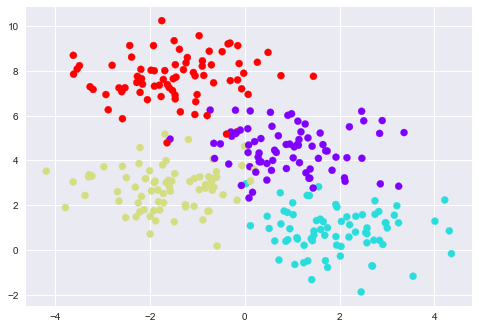

In [99]:
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std= 1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

A simple decision tree built on this data will iteratively split the data along one or the other axis according to some quantitative criterion, and a each level assign of the new region according to a majority vote of points within it.
![](https://www.safaribooksonline.com/library/view/python-data-science/9781491912126/assets/pyds_05in69.png)

After the first split every point in the upper branch remains unchanged, so there is no need to futher subsidive this branch. Axcept the nodes that contains all of one color, at each level every region is again split along one of the two features.

In [100]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [101]:
#utility function to help us visualize the output of the classifier

def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

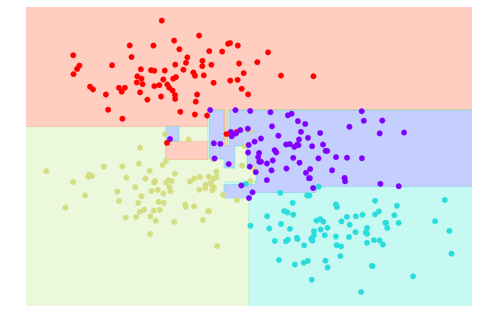

In [102]:
visualize_classifier(DecisionTreeClassifier(), X, y)

We can see that there is an overfitting, and this a general property of decision trees, it is very common to go too deep in the tree, and thus to fit details of the particular data rather than the overall properties of the distributions they are drawn from.

That's why for Decision Trees we should train the model on different sets of our data to further improve it...

#### Ensemples of Estimators: Random forests
Multiple overfitting estimators can be combined to reduce the effect od this overfitting is what underlies an ensemble method called bagging. Bagging makes use of an ensemble of parallel estimators, each of which overfits the data, and averages the results to find a better classification. An ensemble of randomized decision trees is know as a random forest

In scikit learn we can apply such a method using BaggingClassifier

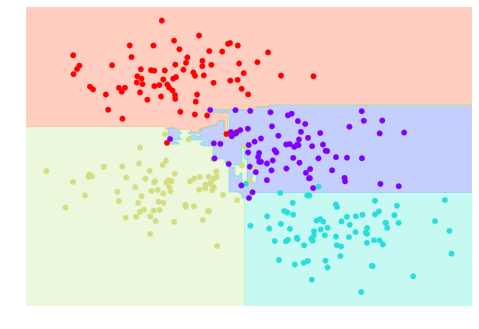

In [103]:
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators = 100, max_samples = 0.8, 
                        random_state = 1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

in this example we have randomized the data by fitting each estimator with a -random subset of 80% of the training points. In practice, decision trees are more effectively randomized when some stochasticity is injected in how the splits are chosen; this way, all the data contributes to the fit each time, but the results of the fit still have the desired randomness. For example, when determining which feature to split on, the randomized tree might select from among the top several features. "more details soon"

In Scikit-Learn, such an optimized ensemble of randomized decision trees is implemented in the RandomForestClassifier estimator

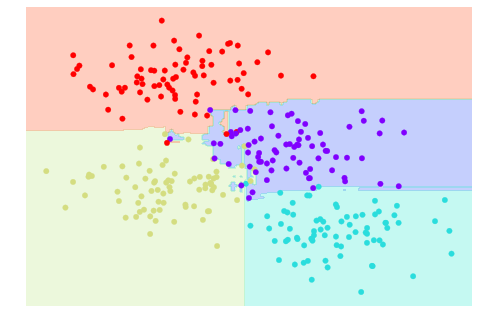

In [104]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, random_state = 0)
visualize_classifier(model, X, y)

by averaging over 100 randomly perturbed models, we end up with an overall model that is much closer to our intuition about how the parameter space should be split.

Random Forest Regression: Random forests can also be made to work in the case of regression

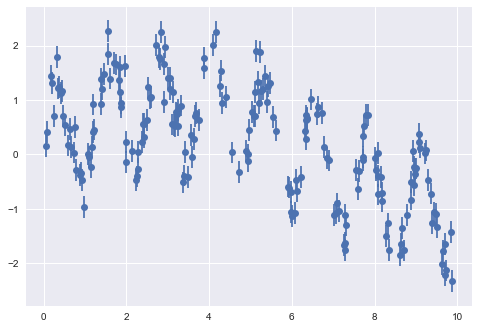

In [105]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))
    
    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.2, fmt='o');

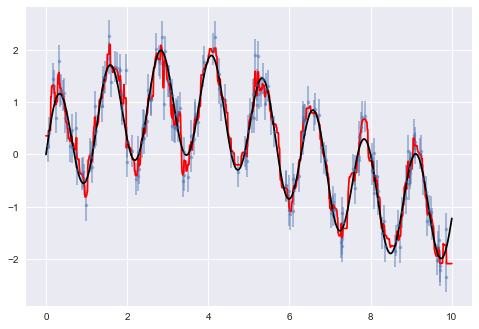

In [106]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma = 0)

plt.errorbar(x, y, 0.3, fmt='.', alpha=0.5)
plt.plot(xfit, yfit, '-r')
plt.plot(xfit, ytrue, '-k');

# Example Random forest for classifying Digits

In [107]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

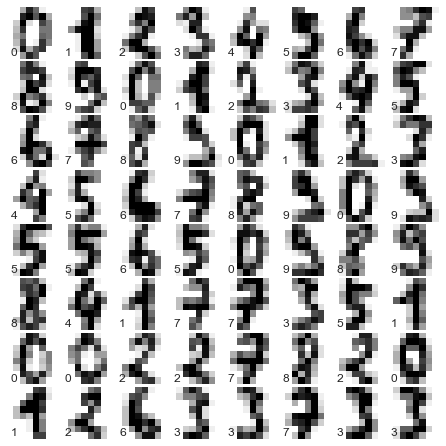

In [108]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [109]:
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)

model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [110]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        38
          1       1.00      0.98      0.99        44
          2       0.95      1.00      0.98        42
          3       0.98      0.98      0.98        45
          4       0.97      1.00      0.99        37
          5       0.98      0.98      0.98        48
          6       1.00      1.00      1.00        52
          7       1.00      0.96      0.98        50
          8       0.96      0.98      0.97        47
          9       0.98      0.98      0.98        47

avg / total       0.98      0.98      0.98       450



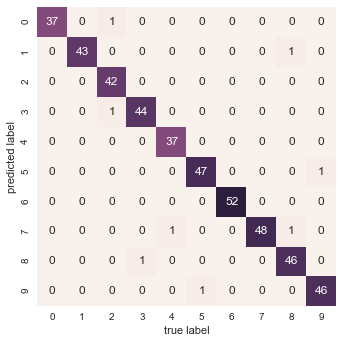

In [111]:
# The confuction matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Summary of Random Forests
Advantages:
- Both training and prediction are very fast, and because the individual trees are independent entities, the process can easily be parallilezed
- The multiple Trees allow for a probabilistic classification
- The nonparametric model is extremly flexible, and can perform well on tasks that are underfit by other estimators

A primary disadvantage of random forests is that the results are not easily interpretable.


--------------------

------------------------

-----------------------

# In depth: Principal Component Analysis
We have been looking in depth at supervised estimators, these are useful for labeled training data, Here we begin looking at several unsupervised estimators, which can highlight interesting aspects of the data without reference to any known labels.

PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more.

Principal component analysis is a fast and flexible unsupervised method for dimensionality reduction in data. Its behavior is easiest to visualize by looking at a two-dimensional dataset.

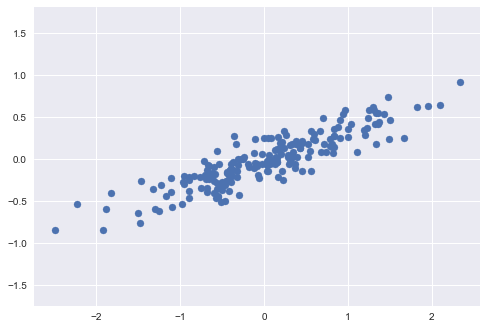

In [112]:
rng = np.random.RandomState(1)

X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

By eye, it is clear that there is a nearly linear relationship between the x and y variables. rather than attempting to predict the y values from the x values, the unsupervised learning problem attempts to learn about the relationship between the x and y values.

In principal component analysis, one quantifies this relationship by finding a list of the principal axes in the data, and using those axes to describe the dataset. Using Scikit-Learn’s PCA estimator, we can compute this as follows

In [113]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

The fit learns some quantities from the data, most importantly the “components” and “explained variance”:

In [114]:
print(pca.components_)
print(pca.explained_variance_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
[ 0.75871884  0.01838551]


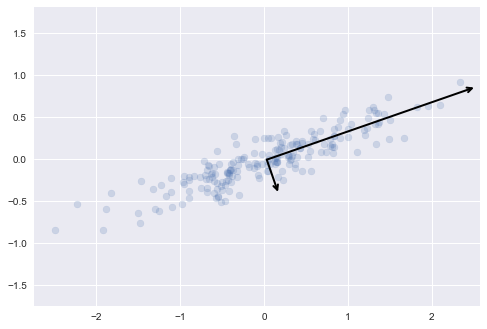

In [115]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ - v)
plt.axis('equal');

These vectors represent the principal axes of the data, and the length is an indication fo how important that axis is in describing the distribution of the data, more precisely it is a measure of the variance of the data when projected onto that axis, The projection of each data point onto the principal axes are the principal component of the data.

If we plot these principal components beside the original data, we get:
![](https://www.safaribooksonline.com/library/view/python-data-science/9781491912126/assets/pyds_05in82.png)

This transformation from data axes to principal axes is as an affine transformation, which basically means it is composed of a translation, rotation, and uniform scaling.


### PCA AS DIMENSIONALITY REDUCTION
Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

In [116]:
pca = PCA(n_components= 1)
pca.fit(X)
X_pca = pca.transform(X)

print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


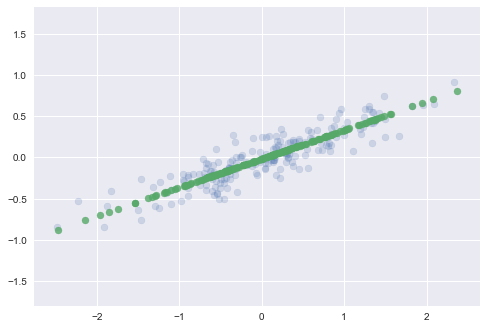

In [117]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

The light points are the original data, while the green points are the projected version. This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance.

This reduced-dimension dataset is in some senses “good enough” to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points is mostly preserved.

### PCA FOR VISUALIZATION: HANDWRITTEN DIGITS
The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when we look at high-dimensional data. To see this, let’s take a quick look at the application of PCA to the digits data

In [118]:
digits = load_digits()
digits.data.shape

(1797, 64)

the data consists of 8×8 pixel images, meaning that they are 64-dimensional. To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two.

In [119]:
pca = PCA(2) #project from 64 to 2
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


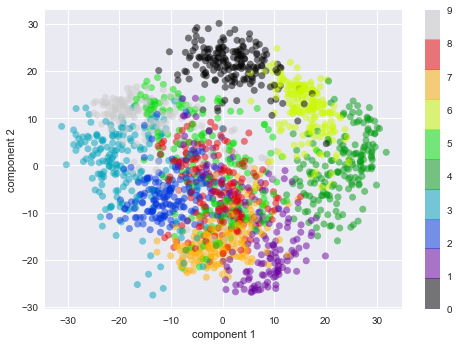

In [120]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

these points are the projection of each data point along the directions with the largest variance. Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an unsupervised manner—that is, without reference to the labels.

What do the components mean? 

We can go a bit further here, and begin to ask what the reduced dimensions mean. This meaning can be understood in terms of combinations of basis vectors. For example, each image in the training set is defined by a collection of 64 pixel values
![](https://www.safaribooksonline.com/library/view/python-data-science/9781491912126/assets/eq_105.png)

One way we can think about this is in terms of a pixel basis. That is, to construct the image, we multiply each element of the vector by the pixel it describes, and then add the results together to build the image
![](https://www.safaribooksonline.com/library/view/python-data-science/9781491912126/assets/eq_106.png)

One way we might imagine reducing the dimension of this data is to zero out all but a few of these basis vectors. For example, if we use only the first eight pixels, we get an eight-dimensional projection of the data (Figure 5-85), but it is not very reflective of the whole image: we’ve thrown out nearly 90% of the pixels!
![](https://www.safaribooksonline.com/library/view/python-data-science/9781491912126/assets/pyds_05in85.png)

Using only eight of the pixel-basis components, we can only construct a small portion of the 64-pixel image. Were we to continue this sequence and use all 64 pixels, we would recover the original image

But the pixel-wise representation is not the only choice of basis. We can also use other basis functions, which each contain some predefined contribution from each pixel, and write something like
![](https://www.safaribooksonline.com/library/view/python-data-science/9781491912126/assets/eq_107.png)

PCA can be thought of as a process of choosing optimal basis functions, such that adding together just the first few of them is enough to suitably reconstruct the bulk of the elements in the dataset. The principal components, which act as the low-dimensional representation of our data, are simply the coefficients that multiply each of the elements in this series.


#### CHOOSING THE NUMBER OF COMPONENTS


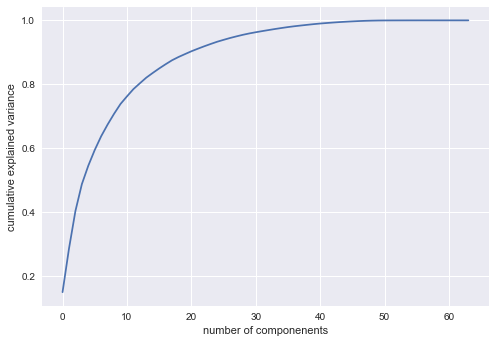

In [121]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of componenents')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total, 64-dimensional variance is contained within the first upper N components. For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we’d need about 20 components to retain 90% of the variance. Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

### PCA as Noise Filtering
PCA can also be used as a filtering approach for noisy data. The idea is this: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise. So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

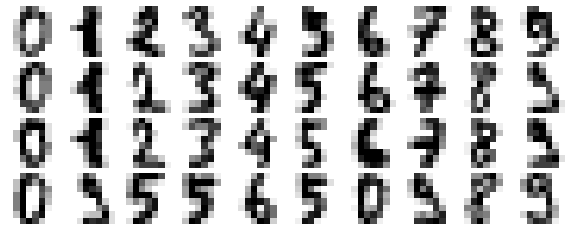

In [122]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
        
plot_digits(digits.data)

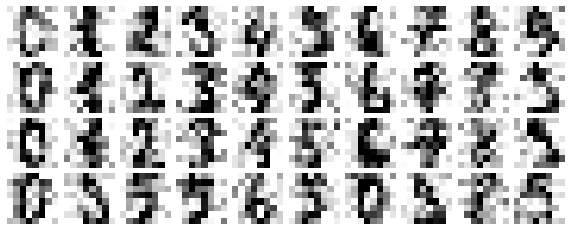

In [123]:
#Let's add some random noise
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

It’s clear by eye that the images are noisy, and contain spurious pixels. Let’s train a PCA on the noisy data, requesting that the projection preserve 50% of the variance

In [124]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

Here 50% of the variance amounts to 12 principal components. Now we compute these components, and then use the inverse of the transform to reconstruct the filtered digits

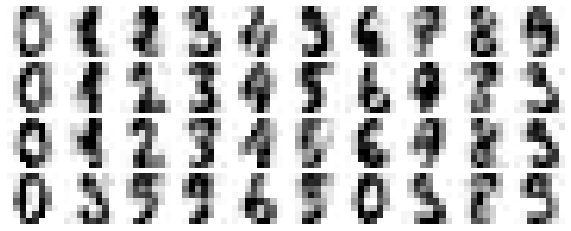

In [125]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

# PCA Summary:
Given any high-dimensional dataset, using PCA in order to visualize the relationship between points (as we did with the digits), to understand the main variance in the data, and to understand the intrinsic dimensionality (by plotting the explained variance ratio). Certainly PCA is not useful for every high-dimensional dataset, but it offers a straightforward and efficient path to gaining insight into high-dimensional data.

PCA’s main weakness is that it tends to be highly affected by outliers in the data

# In-Depth: k-Means Clustering
PCA is a dimensionality Reduction algotithm, Here we will move on to another class of unsepervised learning models: clustering algorithms. Clustering algorithms seek to learn, from the properties of the data, an optimal division or discrete labeling of groups of points.

k-means is one of the simplest to understand. K-means searches for a predetermined number of clusters within an unlabeled multidimensional dataset. It accomplished this using a simple conception of what the optimal clustering looks like:
- The clusters center is the arithmetic mean of all the points belonging to the cluster
- Each point is closer to its own cluster center than to other cluster centers

Those two assumptions are the basis of k-means model.

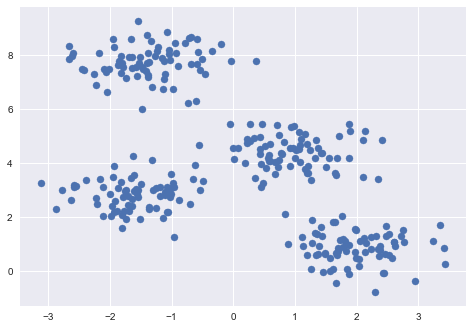

In [126]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s = 50);

In [127]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

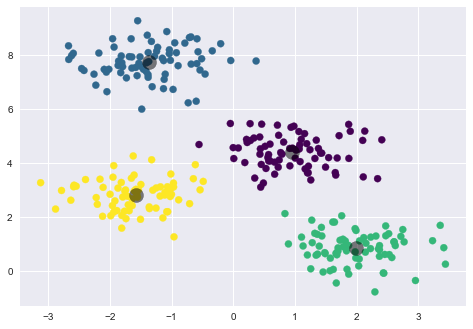

In [128]:
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

he k-means algorithm (at least in this simple case) assigns the points to clusters very similarly to how we might assign them by eye. But you might wonder how this algorithm finds these clusters so quickly! After all, the number of possible combinations of cluster assignments is exponential in the number of data points.

### K-means Algorithm: Expectation-Maximization
EM is a powerful algorithm that comes up in a variety of contexts within data science. In short EM approach consists of the following procedure:
- Guess come clusters centers
- repeat until converged
- Assign points to the nearest cluster center
- set the cluster centers to the mean
![](https://www.safaribooksonline.com/library/view/python-data-science/9781491912126/assets/pyds_05in112.png)

Some problems with this method
- The starting Guess can lead to some poor results
- the number of clusters must be selected beforehand
- K-means is limited to linear cluster boundaries "We can use SpectralClustering to project in a higher dimension and improve the result"
- can be slow for large numbers of samples

### Example: K-means on Digits

In [129]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [130]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

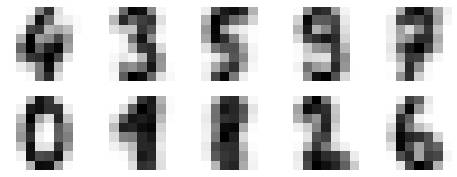

In [131]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [132]:
#Even without labels k-means produces some nice results. k-measn knows nothing about the label
#of each cluster, so we should match each learned cluster with the true labels
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [133]:
accuracy_score(digits.target, labels)

0.79354479688369506

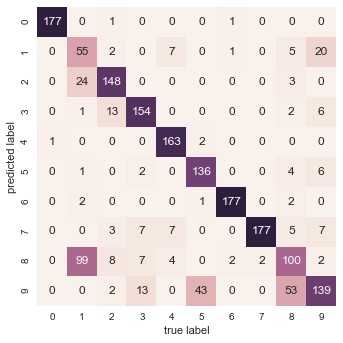

In [134]:
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

As we might expect from the cluster centers we visualized before, the main point of confusion is between the eights and ones. But this still shows that using k-means, we can essentially build a digit classifier without reference to any known labels!

We can use the t-distributed stochastic neighbor embedding (t-SNE) algorithm to preprocess the data before performing k-means. t-SNE is a nonlinear embedding algorithm that is particularly adept at preserving points within clusters.

In [135]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='pca', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)

KeyboardInterrupt: 

80% accuracy without using labels

## Example: K-means for color compression
One interesting application of clustering is in color compression within images. For example, imagine you have an image with millions of colors. In most images, a large number of the colors will be unused, and many of the pixels in the image will have similar or even identical colors.

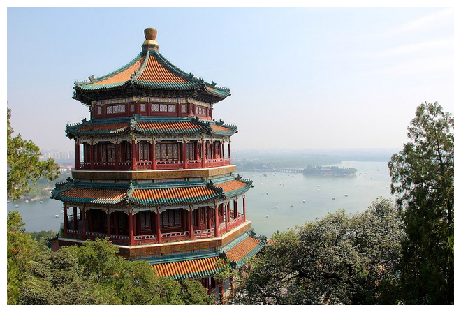

In [136]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [137]:
china.shape

(427, 640, 3)

In [138]:
# We will reshape the data, and rescale the colors between 0 and 1
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [139]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

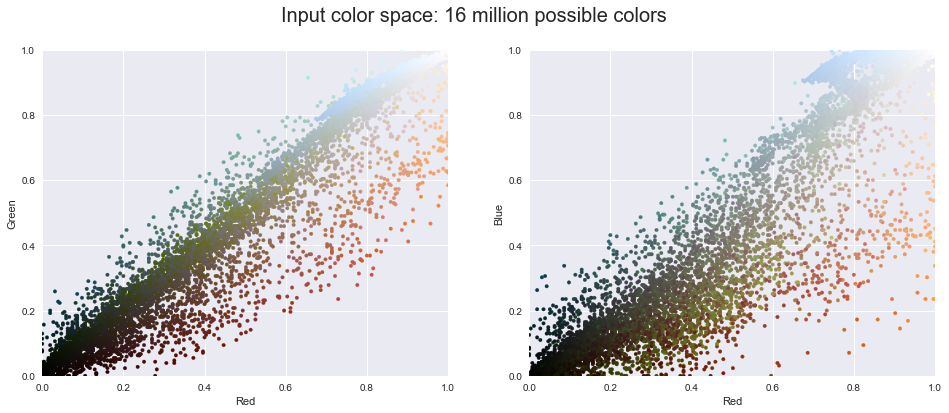

In [140]:
plot_pixels(data, title='Input color space: 16 million possible colors')

Now let’s reduce these 16 million colors to just 16 colors, using a k-means clustering across the pixel space. Because we are dealing with a very large dataset, we will use the mini batch k-means, which operates on subsets of the data to compute the result much more quickly than the standard k-means algorithm

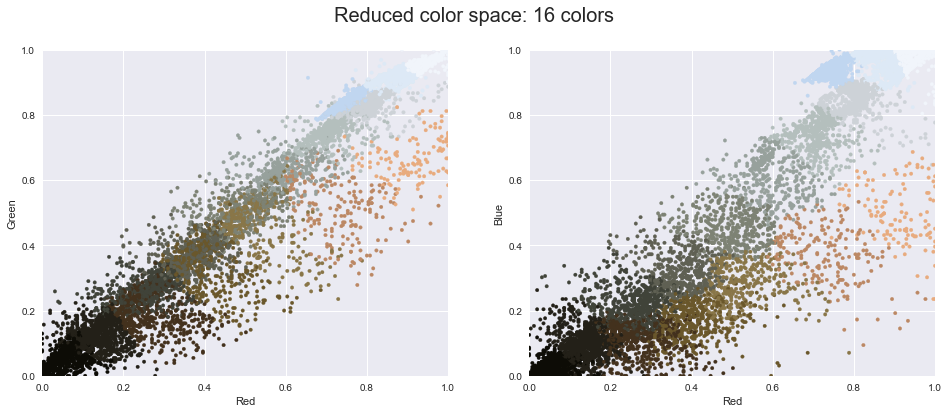

In [141]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")

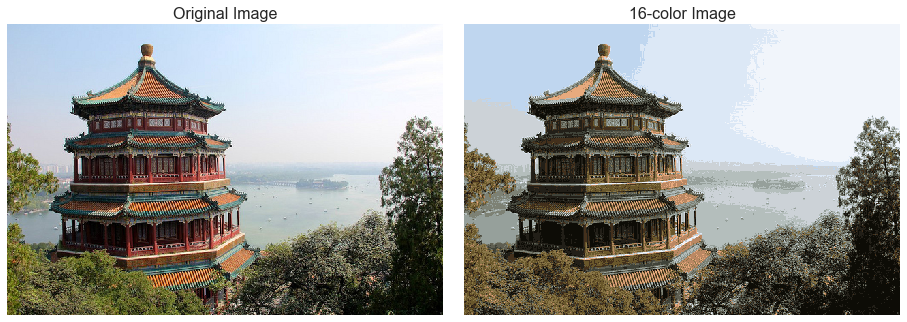

In [142]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
          subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

Some detail is certainly lost in the rightmost panel, but the overall image is still easily recognizable. This image on the right achieves a compression factor of around 1 million! While this is an interesting application of k-means, there are certainly better way to compress information in images. But the example shows the power of thinking outside of the box with unsupervised methods like k-means.

# In Depth: Gaussian Micture Models
The k-means clustering model explored in the previous section is simple and relatively easy to understand, but its simplicity leads to practical challenges in its application. In particular, the nonprobabilistic nature of k-means and its use of simple distance-from-cluster-center to assign cluster membership leads to poor performance for many real-world situations. In this section we will take a look at Gaussian mixture models, which can be viewed as an extension of the ideas behind k-means, but can also be a powerful tool for estimation beyond simple clustering.

if we have simple blobs of data, the k-means algorithm can quickly label those clusters in a way that closely matches what we might do by eye

In [143]:
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1]

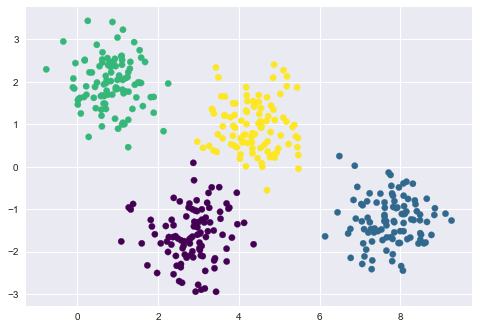

In [144]:
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

One way to think about the k-means model is that it places a circle (or, in higher dimensions, a hyper-sphere) at the center of each cluster, with a radius defined by the most distant point in the cluster. This radius acts as a hard cutoff for cluster assignment within the training set: any point outside this circle is not considered a member of the cluster. We can visualize this cluster model with the following function

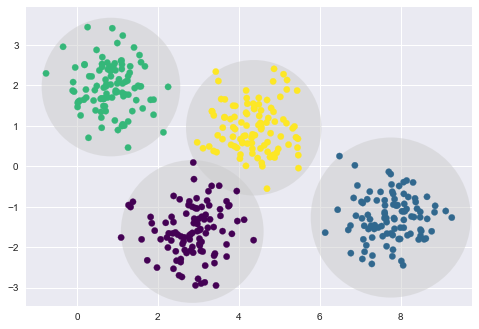

In [145]:
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the k-means model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
        

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

An important observation for k-means is that these cluster models must be circular: k-means has no built-in way of accounting for oblong or elliptical clusters.

lack of flexibility in cluster shape and lack of probabilistic cluster assignment—mean that for many datasets (especially low-dimensional datasets) it may not perform as well as we might hope

### Gaussian Mixture Models
A Gaussian mixture model, attempts to find a mixture of multidimensional Guassian probability distributions that best model any input dataset. In the simplest case GMM can be used for finding clusters in the same manners as k-means

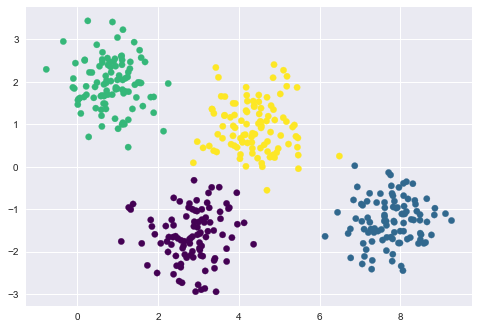

In [146]:
from sklearn.mixture import GMM
gmm = GMM(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

GMM contains a probabilistic model under the hood, it is also possible to find probabilistic cluster assignments.in scikit we do this using predict_proba method

In [147]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[ 0.     0.475  0.     0.525]
 [ 1.     0.     0.     0.   ]
 [ 1.     0.     0.     0.   ]
 [ 0.     0.     0.     1.   ]
 [ 1.     0.     0.     0.   ]]


We can visualize this uncertainty by making the size of each point proportional to the certainty of its predictions.

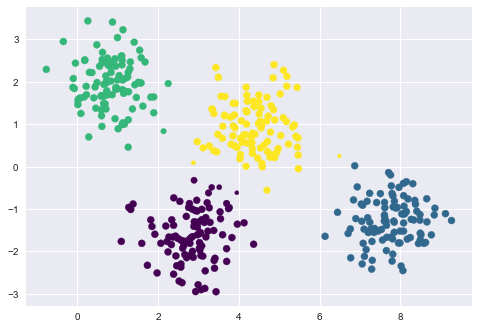

In [148]:
size = 50 * probs.max(1) ** 2
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

Under the hood a GMM is very similar to k-means it uses Expectation Maximization approach that quantitatively does the following:
- Choose a starting guess for the location shape
- Repeat until converged
- For each point, find weights encoding the probability of membership in each cluster
- for each cluster, update its location, normalization, and shape based on all points making use of the weights

The result is that each cluster is associated not with a hard edged sphere, but with a smooth Gaussian model.

In [149]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

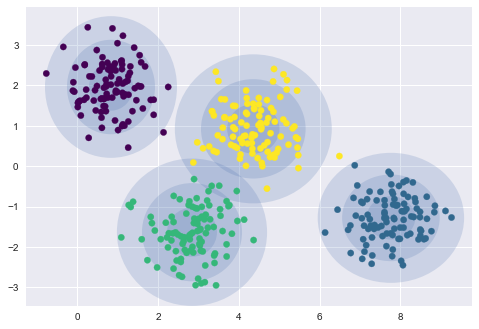

In [150]:
gmm = GMM(n_components=4, random_state=42)
plot_gmm(gmm, X)

### Chosing a covariance type

This hyperparameter controls the degrees of freedom in the shape of each cluster; it is essential to set this carefully for any given problem. The default is covariance_type="diag", which means that the size of the cluster along each dimension can be set independently, with the resulting ellipse constrained to align with the axes. A slightly simpler and faster model is covariance_type="spherical", which constrains the shape of the cluster such that all dimensions are equal. The resulting clustering will have similar characteristics to that of k-means, though it is not entirely equivalent. A more complicated and computationally expensive model (especially as the number of dimensions grows) is to use covariance_type="full", which allows each cluster to be modeled as an ellipse with arbitrary orientation

### GMM as density Estimation
Though GMM is often categorized as a clustering algorithm, fundamentally it is an algorithm for density estimation. That is to say, the result of a GMM fit to some data is technically not a clustering model, but a generative probabilistic model describing the distribution of the data.

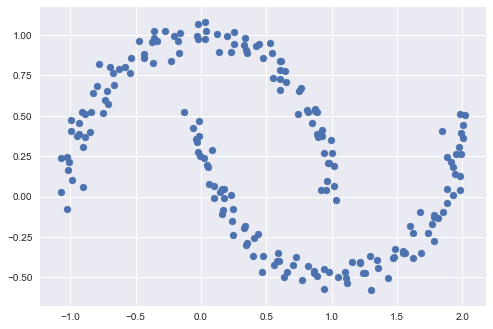

In [151]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

If we try to fit this to a two-component GMM viewed as a clustering model, the results are not particularly useful

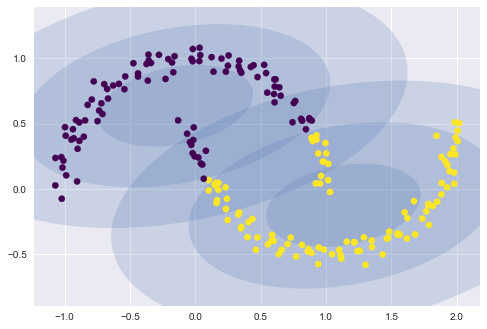

In [152]:
gmm2 = GMM(n_components=2, covariance_type='full', random_state=0)
plot_gmm(gmm2, Xmoon)

But if we instead use many more components and ignore the cluster labels, we find a fit that is much closer to the input data

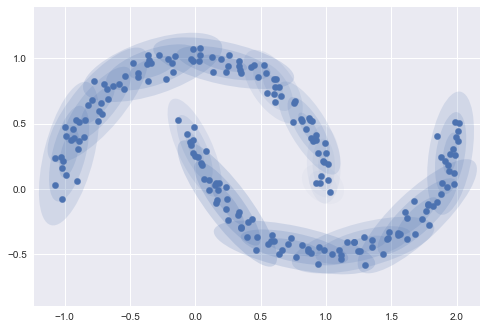

In [153]:
gmm16 = GMM(n_components=16, covariance_type='full', random_state=0)
plot_gmm(gmm16, Xmoon, label=False)

Here the mixture of 16 Gaussians serves not to find separated clusters of data, but rather to model the overall distribution of the input data. This is a generative model of the distribution, meaning that the GMM gives us the recipe to generate new random data distributed similarly to our input. For example, here are 400 new points drawn from this 16-component GMM fit to our original data

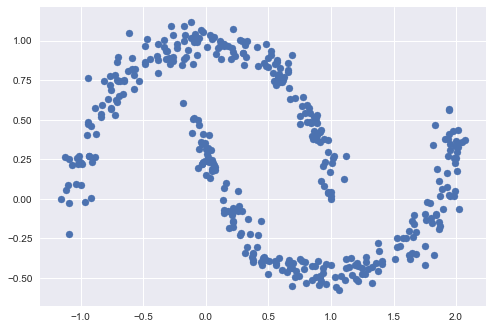

In [154]:
Xnew = gmm16.sample(400, random_state=42)
plt.scatter(Xnew[:, 0], Xnew[:, 1]);

### How many componenets?

The fact that GMM is a generative model gives us a natural means of determining the optimal number of components for a given dataset. A generative model is inherently a probability distribution for the dataset, and so we can simply evaluate the likelihood of the data under the model, using cross-validation to avoid overfitting. Another means of correcting for overfitting is to adjust the model likelihoods using some analytic criterion such as the Akaike information criterion (AIC) or the Bayesian information criterion (BIC). Scikit-Learn’s GMM estimator actually includes built-in methods that compute both of these, and so it is very easy to operate on this approach

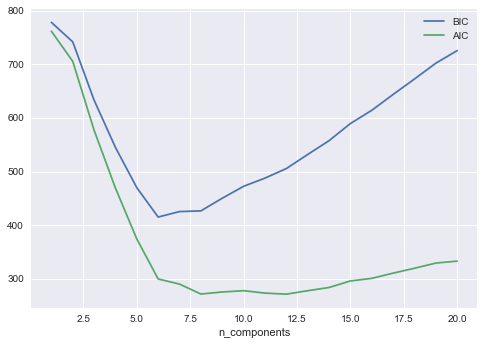

In [155]:
n_components = np.arange(1, 21)
models = [GMM(n, covariance_type='full', random_state=0).fit(Xmoon)
          for n in n_components]

plt.plot(n_components, [m.bic(Xmoon) for m in models], label='BIC')
plt.plot(n_components, [m.aic(Xmoon) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

The optimal number of clusters is the value that minimizes the AIC or BIC, depending on which approximation we wish to use. The AIC tells us that our choice of 16 components was probably too many: around 8–12 components would have been a better choice. As is typical with this sort of problem, the BIC recommends a simpler model.

this choice of number of components measures how well GMM works as a density estimator, not how well it works as a clustering algorithm.

### GMM for Generating New Data
We just saw a simple example of using GMM as a generative model of data in order to create new samples from the distribution defined by the input data. Here we will run with this idea and generate new handwritten digits from the standard digits dataset

In [156]:
digits = load_digits()
digits.data.shape

(1797, 64)

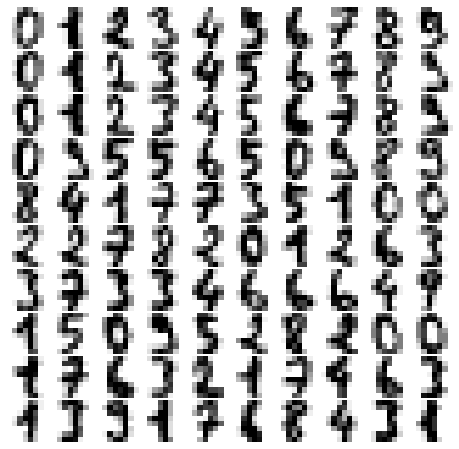

In [157]:
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
plot_digits(digits.data)

We have nearly 1,800 digits in 64 dimensions, and we can build a GMM on top of these to generate more. GMMs can have difficulty converging in such a high dimensional space, so we will start with an invertible dimensionality reduction algorithm on the data. Here we will use a straightforward PCA, asking it to preserve 99% of the variance in the projected data

In [158]:
from sklearn.decomposition import PCA
pca = PCA(0.99, whiten = True)
data = pca.fit_transform(digits.data)
data.shape

(1797, 41)

The result is 41 dimensions, a reduction of nearly 1/3 with almost no information loss. Given this projected data, let’s use the AIC to get a gauge for the number of GMM components we should use

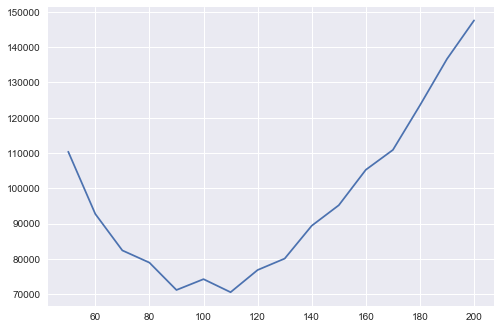

In [159]:
n_components = np.arange(50, 210, 10)
models = [GMM(n, covariance_type='full', random_state=0)
          for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics);

It appears that around 110 components minimizes the AIC

In [160]:
gmm = GMM(110, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_)

True


In [161]:
data_new = gmm.sample(100, random_state=0)
data_new.shape

(100, 41)

Finally, we can use the inverse transform of the PCA object to construct the new digits

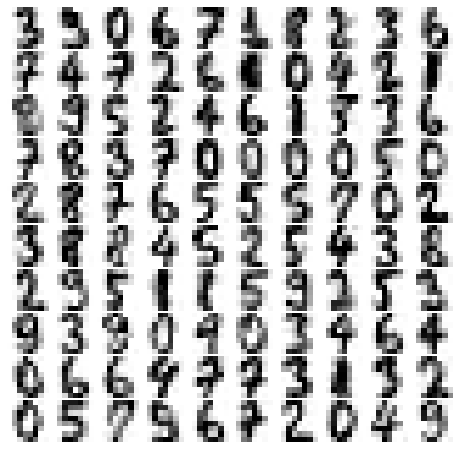

In [162]:
digits_new = pca.inverse_transform(data_new)
plot_digits(digits_new)

given a sampling of handwritten digits, we have modeled the distribution of that data in such a way that we can generate brand new samples of digits from the data: these are “handwritten digits” that do not individually appear in the original dataset, but rather capture the general features of the input data as modeled by the mixture model.

# Application: A Face Detection Pipeline
HOG Features: Histogram of Gradients is a straightforward feature extraction procedure that was developed in the context of identifying pedestrians within images:
- Optionally prenormalize images
- Convolve the image with two filters that are sensitive to horizontal and vertical brithness gradients.
- Subdivide the image into cells of a predetemined size, and compute a histogram of the gradient orientations within each cell
- Normalize the histograms in each cell by comparing to the block of neighboring cells
-Construct a one dimensional feature vector from information in each cell

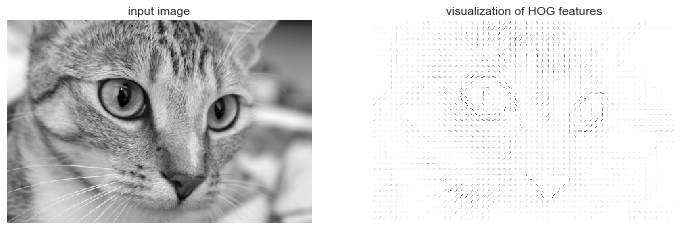

In [163]:
from skimage import data, color, feature
import skimage.data

image = color.rgb2gray(data.chelsea())
hog_vec, hog_vis = feature.hog(image, visualise = True)

fig, ax = plt.subplots(1, 2, figsize = (12, 6),
                      subplot_kw = dict(xticks=[], yticks=[]))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('input image')

ax[1].imshow(hog_vis)
ax[1].set_title('visualization of HOG features');

Now we will build a face detection ausing linear support vector machine
1. Obtain some images of faces to constitue positive training samples
2. Obtain some images of nonfaces to constitue negative training samples
3. extract hog features from these training samples
4. Train a linear SVM classifier
5. For a new image, pass a sliding window to evaluate if this image got a face or not
6. if there are multiple detections combine them

In [164]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people()
positive_patches = faces.images
positive_patches.shape

(13233, 62, 47)

In [165]:
#We got 13000 positive images
#2. now we need as set of same sized images that do not have faces on them
from skimage import data, transform

imgs_to_use = ['camera', 'text', 'coins', 'moon', 'page', 'clock', 
               'immunohistochemistry', 'chelsea', 'coffee', 'hubble_deep_field']
images = [color.rgb2gray(getattr(data, name)()) for name in imgs_to_use]

In [166]:
from sklearn.feature_extraction.image import PatchExtractor

def extract_patches(img, N, scale = 1.0, patch_size = positive_patches[0].shape):
    extracted_patch_size = \
    tuple((scale * np.array(patch_size)).astype(int))
    extractor = PatchExtractor(patch_size=extracted_patch_size,
                               max_patches=N, random_state=0)
    patches = extractor.transform(img[np.newaxis])
    if scale != 1:
        patches = np.array([transform.resize(patch, patch_size)
                            for patch in patches])
    return patches

negative_patches = np.vstack([extract_patches(im, 1000, scale) for im in images for scale in [0.5, 1.0, 2.0]])
negative_patches.shape

(30000, 62, 47)

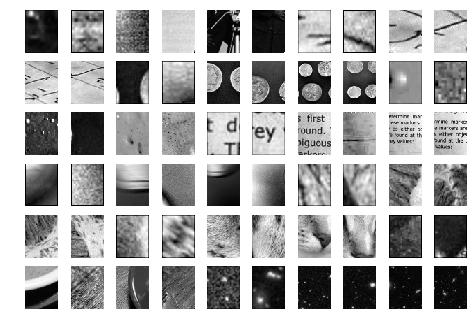

In [167]:
# we have 30000 images that do not contain faces
fig, ax = plt.subplots(6, 10)
for i, axi in enumerate(ax.flat):
    axi.imshow(negative_patches[500 * i], cmap='gray')
    axi.axis('off')

In [169]:
# 3. combine sets and extract HOG features "tis should take some time"
from itertools import chain
X_train = np.array([feature.hog(im) for im in chain(positive_patches, negative_patches)])
y_train = np.zeros(X_train.shape[0])
y_train[:positive_patches.shape[0]] = 1

In [170]:
X_train.shape

(43233, 1215)

In [171]:
#4. Train an SVM, but before let's look at what a Gaussian NB give us
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import cross_val_score

cross_val_score(GaussianNB(), X_train, y_train)

array([ 0.94108667,  0.87495663,  0.93976823])

In [172]:
#let's do a grid search for optimal parameters
from sklearn.svm import LinearSVC
from sklearn.grid_search import GridSearchCV
grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(X_train, y_train)
grid.best_score_

0.9866074526403442

In [173]:
grid.best_params_

{'C': 4.0}

In [174]:
model = grid.best_estimator_
model.fit(X_train, y_train)

LinearSVC(C=4.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

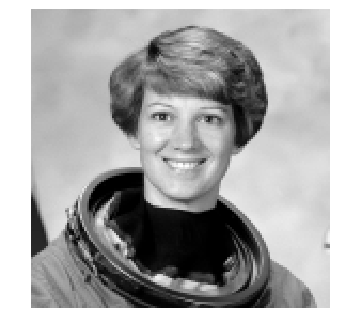

In [175]:
#5.find faces in images
test_image = skimage.data.astronaut()
test_image = skimage.color.rgb2gray(test_image)
test_image = skimage.transform.rescale(test_image, 0.5)
test_image = test_image[:140, 40:180]

plt.imshow(test_image, cmap='gray')
plt.axis('off');

In [176]:
#Let's create a window that iterates over patches of this images, and compute HOG features for each patch

def sliding_window(img, patch_size = positive_patches[0].shape,
                  istep = 2, jstep = 2, scale = 1.0):
    Ni, Nj = (int(scale * s) for s in patch_size)
    for i in range(0, img.shape[0] - Ni, istep):
        for j in range(0, img.shape[1] - Ni, jstep):
            patch = img[i:i + Ni, j:j + Nj]
            if scale != 1:
                patch = transform.resize(patch, patch_size)
            yield (i, j), patch
            
indices, patches = zip(*sliding_window(test_image))
patches_hog = np.array([feature.hog(patch) for patch in patches])
patches_hog.shape

(1521, 1215)

In [177]:
labels = model.predict(patches_hog)
labels.sum()

33.0

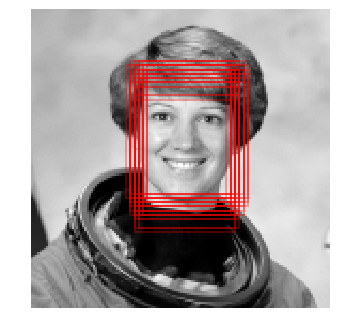

In [178]:
#We have found 33 detections

ig, ax = plt.subplots()
ax.imshow(test_image, cmap='gray')
ax.axis('off')

Ni, Nj = positive_patches[0].shape
indices = np.array(indices)

for i, j in indices[labels == 1]:
    ax.add_patch(plt.Rectangle((j, i), Nj, Ni, edgecolor='red',
                               alpha=0.3, lw=2,
                               facecolor='none'))

This is a very basic example of face detection, Our training set, for example is not complete, specially for negative values, there is a lot of things that look like a face or have the texture of skin and are not... so growing our data is one way to improve this model, our model have a static window size, and we have too many detections, we should improve it by choosing the optimal one only